In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from scipy import stats

from scipy.stats import zscore
import matplotlib.pyplot as plt 

In [0]:
from google.colab import drive
drive.mount('/content/drive')





Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv("parkinson.csv")

In [0]:
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [0]:
#X =  df.drop(["name","status"], axis=1)
#y =  df.pop("status")

In [0]:
#y.value_counts()

1    147
0     48
Name: status, dtype: int64

In [0]:
df.group=df.groupby(['status'])


In [0]:
df.g1=df.group.get_group(1)

In [0]:
df.g2=df.group.get_group(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [0]:
g1=df.g1['MDVP:Fhi(Hz)']

In [0]:
g2=df.g2['MDVP:Fhi(Hz)']



The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [0]:
stats.shapiro(g1)

(0.6788195371627808, 1.662593458911081e-16)

In [0]:
stats.shapiro(g2)

(0.7427830696105957, 8.228923320530157e-08)

In [0]:
stats.mannwhitneyu(g1,g2)

MannwhitneyuResult(statistic=2294.0, pvalue=0.00013981351194737522)

NHR

In [0]:
g3=df.g1['NHR']
g4=df.g2['NHR']

In [0]:
stats.shapiro(g3)


(0.5413700342178345, 1.5142712090337817e-19)

In [0]:
stats.shapiro(g4)

(0.49190962314605713, 1.1647310720064308e-11)

In [0]:
stats.mannwhitneyu(g3,g4)

MannwhitneyuResult(statistic=1600.5, pvalue=6.881212446333277e-09)

In [0]:
X =  df.drop(["name","status"], axis=1)
y =  df.pop("status")

In [0]:
Dt_model=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [0]:
from sklearn.model_selection import GridSearchCV
parameter={'max_depth':np.arange(1,10),'criterion' : ['entropy','gini']}
GS=GridSearchCV(Dt_model,parameter,cv=3)
GS.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
GS.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [0]:
Dt_model2=DecisionTreeClassifier(max_depth=5,criterion='entropy',random_state=0)

In [0]:
Rf_model = RandomForestClassifier(n_estimators=57,criterion='entropy',random_state=0 )

In [0]:
bag_model=BaggingClassifier(n_estimators=10,random_state=0)##Fully grown decision tree

In [0]:
bag_model2=BaggingClassifier(n_estimators=10,random_state=0,base_estimator=Dt_model2)## Regularised decision tree

In [0]:
#bag_model3=BaggingClassifier(n_estimators=15,random_state=0,base_estimator=Dt_model2)## Regularised decision tree

In [0]:
#bag_model4=BaggingClassifier(n_estimators=5,random_state=0,base_estimator=Dt_model2)## Regularised decision tree

In [0]:
models = []
models.append(('DecisionTree', Dt_model))
models.append(('DT_Regularized',Dt_model2))
models.append(('RandomForest', Rf_model))
models.append(('Bagged_DT',bag_model))
models.append(('Bagged_Regularised1',bag_model2))
#models.append(('Bagged_Regularised2',bag_model3))
#models.append(('Bagged_Regularised3',bag_model4))

In [0]:
models

[('DecisionTree',
  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=0,
              splitter='best')),
 ('DT_Regularized',
  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=0,
              splitter='best')),
 ('RandomForest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,


In [0]:
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=5,random_state=2)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.mean(cv_results), np.var(cv_results,ddof=1))
    print(msg)

DecisionTree: 0.877722 (0.006208)
DT_Regularized: 0.905228 (0.004381)
RandomForest: 0.956177 (0.002460)
Bagged_DT: 0.920080 (0.002995)
Bagged_Regularised1: 0.906161 (0.003356)


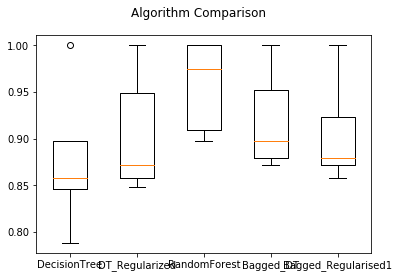

In [0]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()